# PROJECT 2 : AUTOMOBILE PRICE PREDICTION
# SUBMITTED BY : RAHUL PRADHAN 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
app = pd.read_csv("AutoData (1).csv")

In [7]:
app.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [9]:
app.shape

(205, 25)

In [10]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### So there are 205 rows and 25 columns in the dataset,in which 15 columns are numerical and 10 are categorical


In [11]:
# separation of numerical and catyegorical column
num_col=[]
cat_col=[]
for i in app.columns:
    if app[i].dtypes=='int64' or app[i].dtypes=='float64':
        num_col.append(i)
    else:
        cat_col.append(i)

In [12]:
num_col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [13]:
cat_col

['make',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

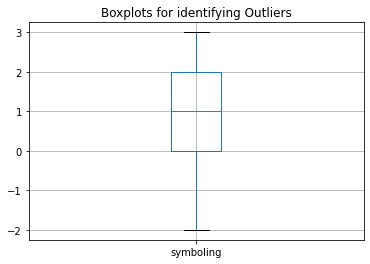

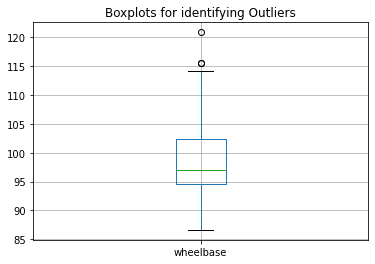

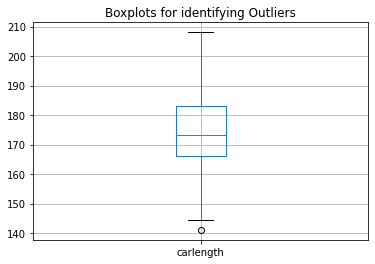

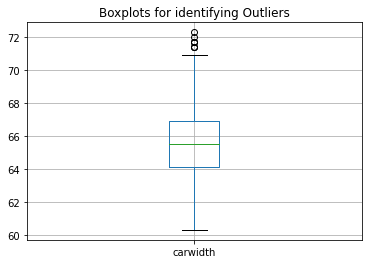

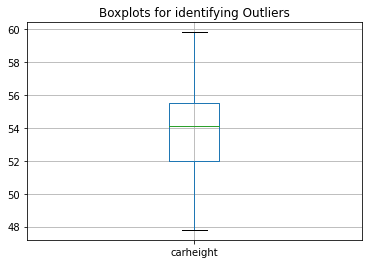

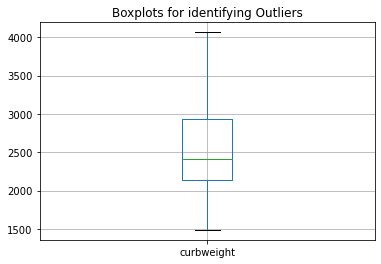

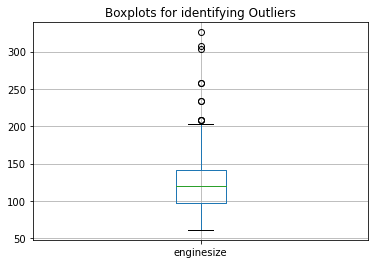

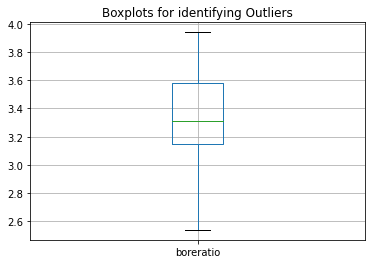

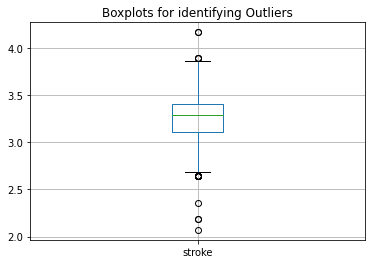

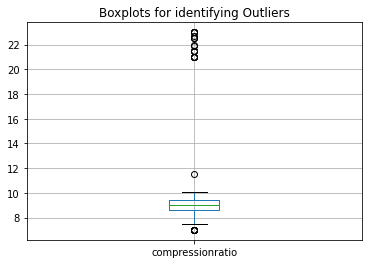

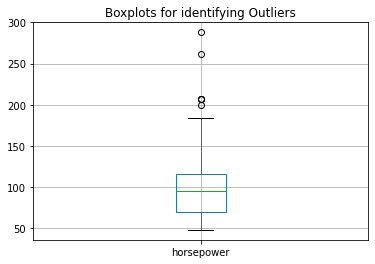

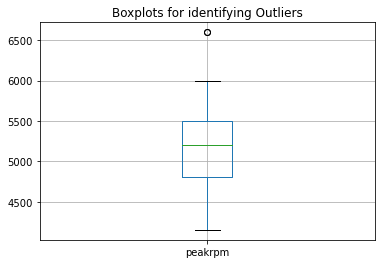

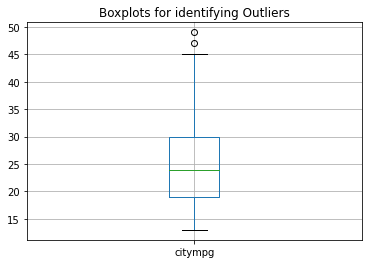

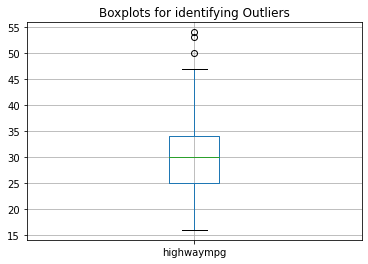

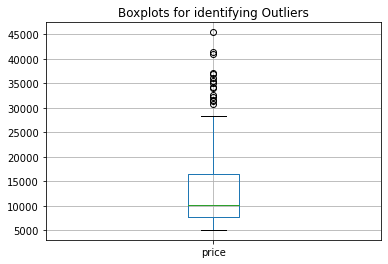

In [15]:
# outliers analysis
for i in num_col:
    app.boxplot(i)
    plt.title("Boxplots for identifying Outliers")
    plt.show()

In [17]:
app.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### There is no null values present in the numerical columns  

In [18]:
app.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [31]:
app['make'] = app['make'].str.split(" ").str.slice(0,1).str.join(" ")

In [32]:
app['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [33]:
app['make'] = app['make'].str.lower()
app['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [34]:
app['make'].replace("vw","volkswagen",inplace = True)
app['make'].replace("vokswagen","volkswagen",inplace = True)
app['make'].replace("porcshce","porsche",inplace = True)
app['make'].replace("maxda","mazda",inplace = True)
app['make'].replace("toyouta","toyota",inplace = True)

app['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

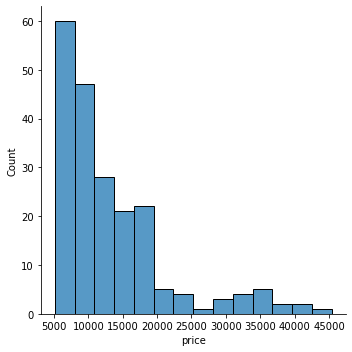

In [35]:
# To show how the price is distributed
sns.displot(app['price'])
plt.show()

In [36]:
# Creating a differenrt dataframe of categorical column
app_cat=app.loc[:,cat_col]
app_cat.head()

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [37]:
# Creating a differenrt dataframe of numerical column
app_num=app.loc[:,num_col]
app_num

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [38]:
print("total number of car making company:",app_cat['make'].nunique())

total number of car making company: 22


In [39]:
app_cat.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [40]:
app_cat.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [41]:
print("Avg price of gas driven cars:" ,app[app.fueltype=="gas"].price.mean())
print("Avg price of diesel driven cars:" ,app[app.fueltype=="diesel"].price.mean())

Avg price of gas driven cars: 12999.7982
Avg price of diesel driven cars: 15838.15


In [44]:
print("Avg price of cars with engine location front:" ,np.around(app[app.enginelocation=="front"].price.mean(),3))
print("Avg price of cars with engine location rear:" ,app[app.enginelocation=="rear"].price.mean())

Avg price of cars with engine location front: 12961.097
Avg price of cars with engine location rear: 34528.0


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

<AxesSubplot:>

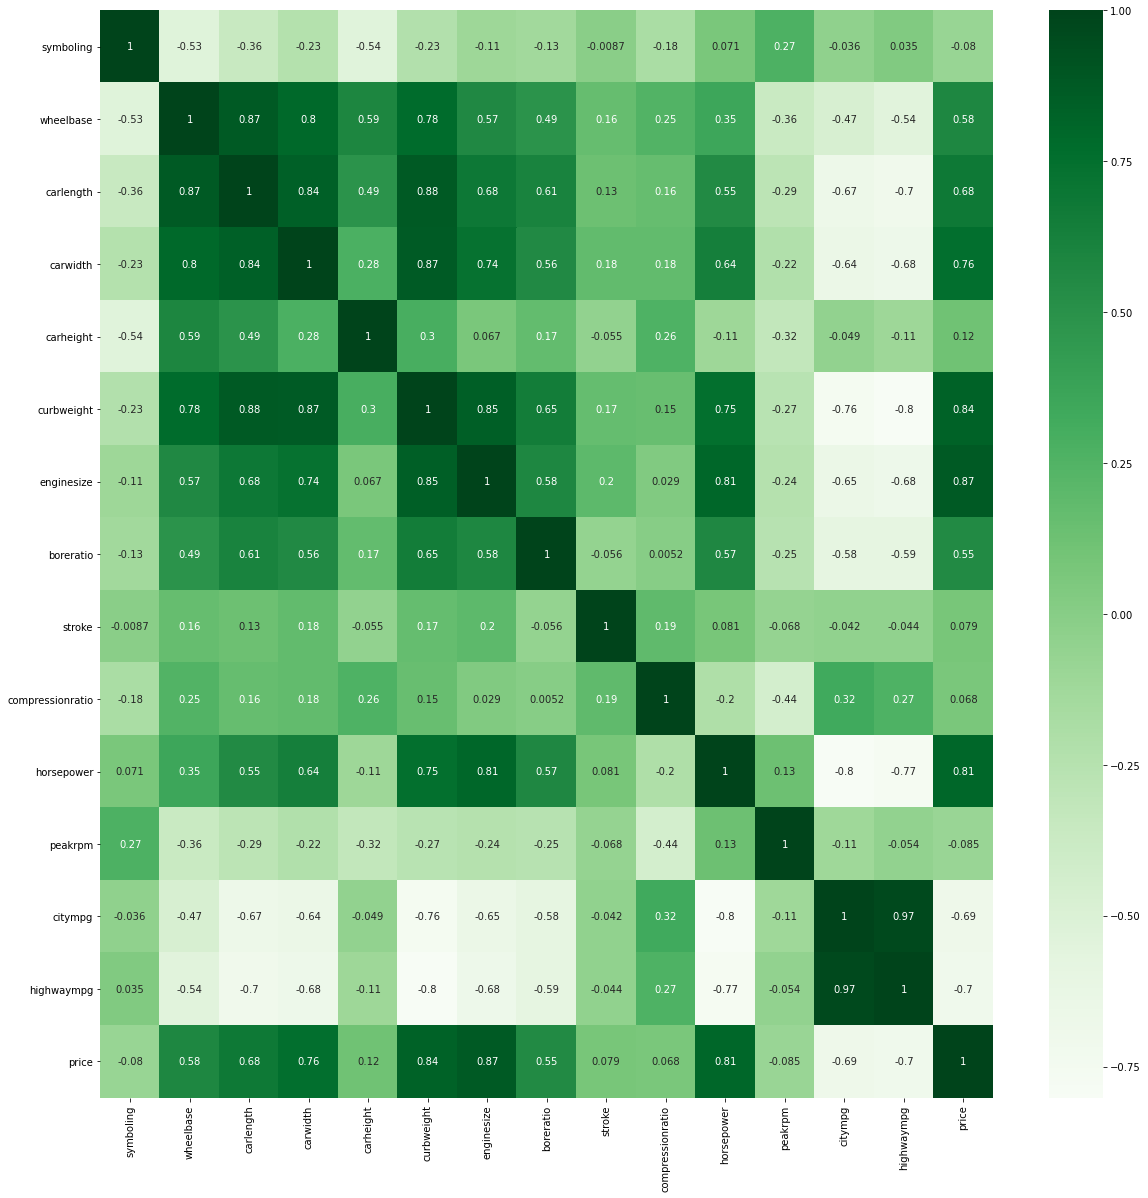

In [46]:
# Identifying the best independent variable on the basis of correlation with the target variable
plt.figure(figsize=(20,20))
sns.heatmap(app.corr(),annot=True,cmap='Greens')

In [47]:
le=LabelEncoder()

In [48]:
app1=app.apply(le.fit_transform)
app1

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,0,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,118
1,5,0,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,137
2,3,0,1,0,1,2,2,0,10,29,...,28,5,1,28,13,45,10,6,9,137
3,4,1,1,0,0,3,1,0,30,45,...,11,5,13,25,22,27,16,11,13,123
4,4,1,1,0,0,3,0,0,28,45,...,22,5,13,25,5,33,16,5,5,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,21,1,0,0,3,2,0,46,63,...,24,5,35,15,20,32,15,10,11,143
201,1,21,1,1,0,3,2,0,46,63,...,24,5,35,15,11,48,14,6,8,161
202,1,21,1,0,0,3,2,0,46,63,...,33,5,26,7,12,38,16,5,6,165
203,1,21,0,1,0,3,2,0,46,63,...,25,3,6,25,31,28,8,13,10,167


<AxesSubplot:>

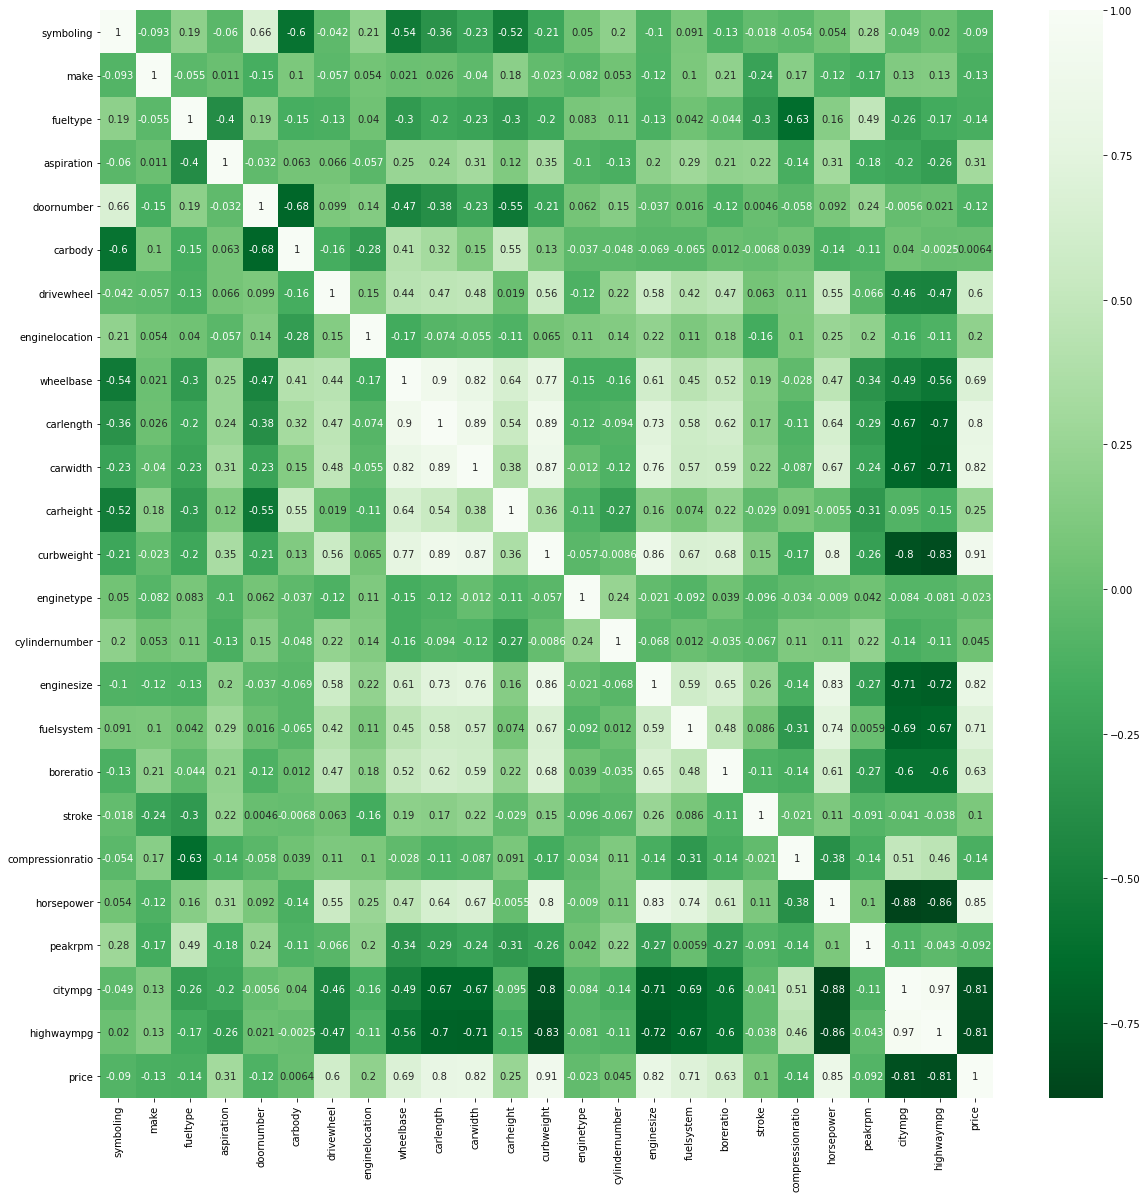

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(app1.corr(),annot=True,cmap="Greens_r")

In [50]:
# Assigning the indipendent and target variable
x_bar=app1.iloc[:,:-1]
y_bar=app1["price"]

In [51]:
from sklearn.ensemble import ExtraTreesRegressor

In [52]:
# Creating model
model=ExtraTreesRegressor()
model.fit(x_bar,y_bar)

ExtraTreesRegressor()

In [53]:
print(model.feature_importances_)

[0.00525841 0.01530504 0.00117391 0.0044256  0.00218721 0.01034749
 0.02642743 0.00109305 0.016202   0.03368463 0.07164128 0.00572812
 0.3277364  0.00200236 0.00330252 0.0791669  0.12271772 0.0063699
 0.00614697 0.00328037 0.09587467 0.00793576 0.07284078 0.07915147]


In [54]:
app1.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### As we see engine size and curbweight and horse power are the most influencial variables

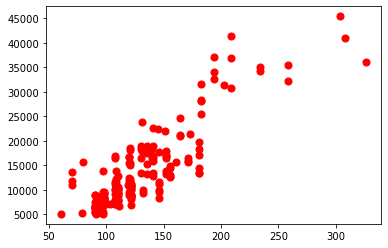

In [55]:
plt.scatter(app['enginesize'], app['price'], c = 'r', s = 50)

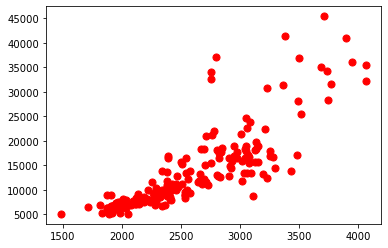

In [56]:
plt.scatter(app['curbweight'], app['price'], c = 'r', s = 50)

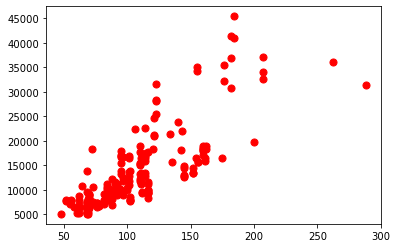

In [57]:
plt.scatter(app['horsepower'], app['price'], c = 'r', s = 50)

In [58]:
# Using enginesize as independent variable
x1=app.loc[:,["enginesize"]]
y1=app.loc[:,["price"]]

In [59]:
# Performing train_test split
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=101)

In [60]:
lr=LinearRegression()

In [61]:
model1=lr.fit(X_train,y_train)

In [62]:
# prediction
y_pred1=model1.predict(X_test)

In [63]:
len(y_pred1)

41

In [64]:
# Using curbweight as independent variable
x2=app.loc[:,["curbweight"]]
y2=app.loc[:,["price"]]

In [65]:
# Performing train_test split
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=101)

In [66]:
a=X_test
b=y_test

In [67]:
model2=lr.fit(X_train,y_train)

In [68]:
# prediction
y_pred2=model2.predict(X_test)

In [69]:
len(X_test)

41

In [70]:
# Using curbweight as independent variable
x3=app.loc[:,["horsepower"]]
y3=app.loc[:,["price"]]

In [71]:
# Performing train_test split
X_train,X_test,y_train,y_test=train_test_split(x3,y3,test_size=0.2,random_state=101)

In [72]:
model3=lr.fit(X_train,y_train)

In [73]:
y_pred3=model3.predict(X_test)

In [76]:
y=app["price"]

In [77]:
# Error calculation
mse1 = mean_squared_error(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)

In [78]:
len(y_test)

41

In [85]:
print("Mean Squared Error", round(mse1,2))
print("Root Mean Squared Error", round(np.sqrt(mse1),2))
print("Mean Absolute Error", round(mae1,2))

Mean Squared Error 7697198.79
Root Mean Squared Error 2774.38
Mean Absolute Error 1985.62


In [86]:
def mape(y_test, y_pred):
    new = (y_test - y_pred)/y_test
    ab = abs(new)
    return f'MAPE Score of {round(ab.mean(),2)*100}'

In [87]:
# Calculating mean absolute error
mape(y_test,y_pred1)

'MAPE Score of price    21.0\ndtype: float64'

In [88]:
mape(y_test,y_pred2)

'MAPE Score of price    20.0\ndtype: float64'

In [89]:
mape(y_test,y_pred3)

'MAPE Score of price    25.0\ndtype: float64'

### As our second model that is prediction based on curbweight has less error so we select that. 

In [91]:
app.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [92]:
from  sklearn.metrics import r2_score

In [93]:
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=101)

In [94]:
r_score=r2_score(y_test,y_pred2)

In [95]:
print("The R square value of the model is:",r_score)

The R square value of the model is: 0.7733052439214944


# Multiple Linear Regression 

<AxesSubplot:>

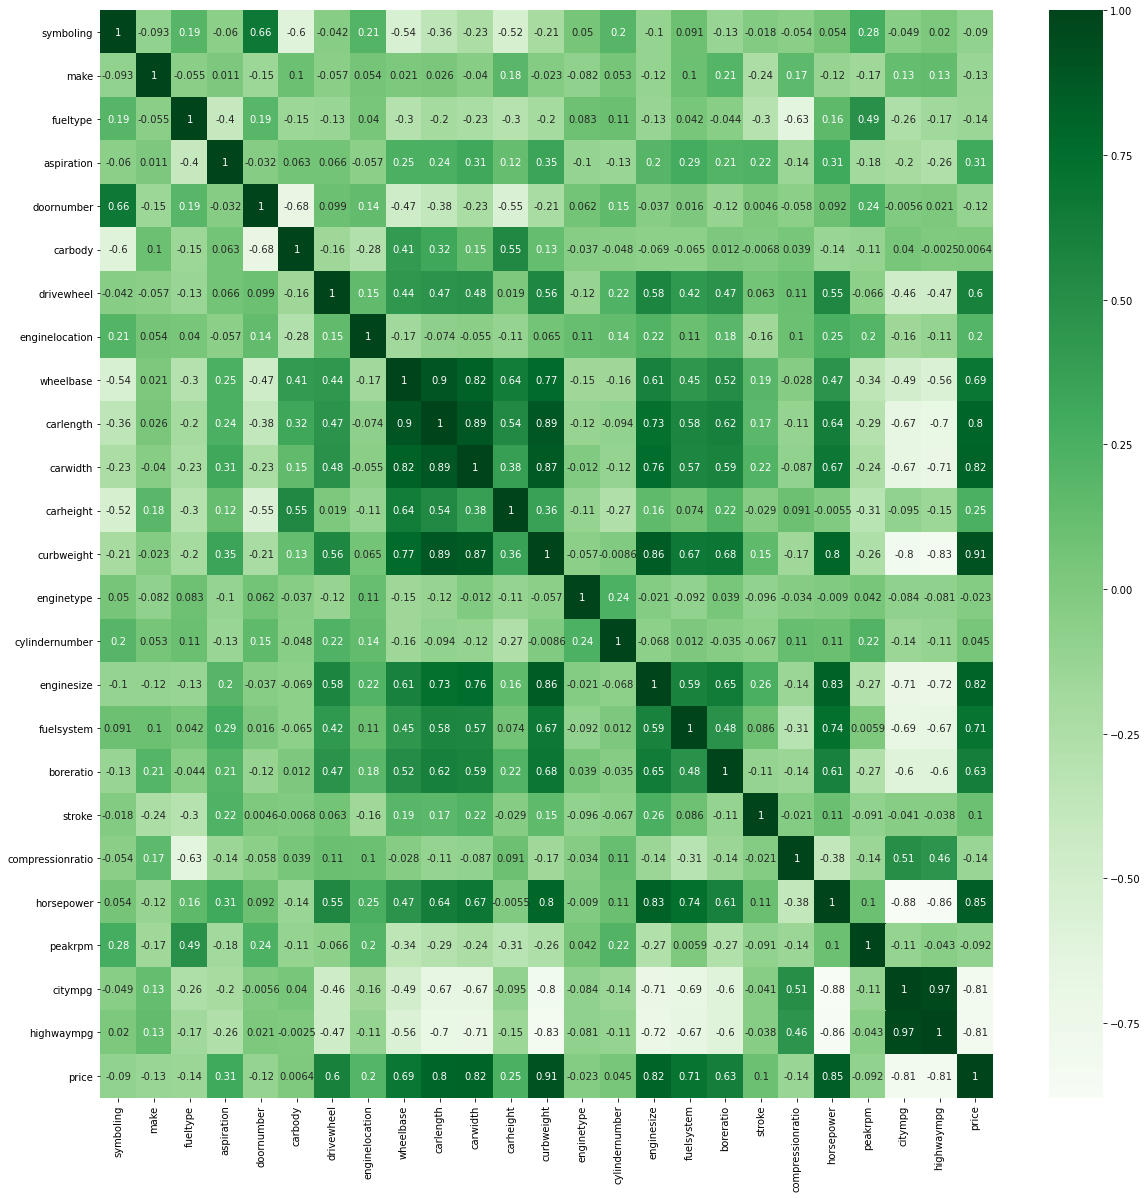

In [96]:
plt.figure(figsize=(20,20))
sns.heatmap(app1.corr(),annot=True,cmap='Greens')

In [97]:
# features selection
model=ExtraTreesRegressor()
model.fit(x_bar,y_bar)

ExtraTreesRegressor()

In [98]:
print(model.feature_importances_)

[0.00600849 0.01570133 0.00080175 0.00419712 0.00237549 0.00988546
 0.03292957 0.00117532 0.02368287 0.04920159 0.04324098 0.00744249
 0.33443912 0.0025502  0.00387908 0.06600339 0.12187546 0.00774019
 0.00564851 0.00407513 0.10735445 0.00710527 0.07647544 0.06621129]


In [99]:
app1.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

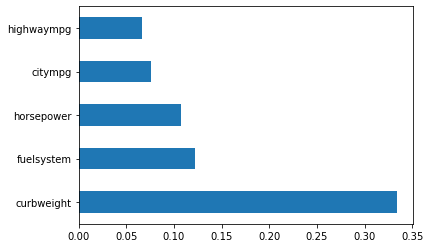

In [101]:
imp_feat=pd.Series(model.feature_importances_,index=app1.iloc[:,:-1].columns)
imp_feat.nlargest(5).plot(kind="barh")
plt.show()

In [102]:
app.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [103]:
## from both we find out "curbweight","horsepower","enginesize","fuelsystem", are most influencial variables
x=app.loc[:,["curbweight","horsepower","enginesize"]]
y=app.loc[:,["price"]]

In [104]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [105]:
X_train

,curbweight,horsepower,enginesize
154,2290,62,92
74,3715,184,304
179,3016,161,171
118,1918,68,90
16,3380,182,209
...,...,...,...
63,2443,64,122
70,3770,123,183
81,2328,88,122
11,2395,101,108


In [106]:
model=lr.fit(X_train,y_train)

In [107]:
y_pred=lr.predict(X_test)

In [108]:
# predictions
y_pred

array([[ 5849.79619064],
       [ 9389.72979011],
       [22266.81878943],
       [ 9002.8077008 ],
       [15259.36375075],
       [23069.35298895],
       [13767.45534824],
       [ 6164.20888899],
       [ 9628.57835181],
       [ 6394.84691622],
       [11939.14295763],
       [15795.51849243],
       [ 6175.31973726],
       [ 5904.92241604],
       [12531.3538048 ],
       [12879.96338928],
       [11293.96515037],
       [11340.27757765],
       [ 5815.32630149],
       [ 6286.8811359 ],
       [10609.19183964],
       [11389.58652841],
       [ 7025.89294818],
       [ 5862.39021342],
       [15541.35501065],
       [34630.333052  ],
       [ 5608.58556463],
       [ 8208.91050605],
       [ 6852.52478567],
       [ 9878.56376743],
       [ 5942.8578952 ],
       [ 7649.81634539],
       [19596.07768716],
       [19252.71074248],
       [18045.67111221],
       [17136.68448134],
       [ 6511.07524233],
       [ 5464.85913998],
       [11333.85184952],
       [ 9916.22362043],


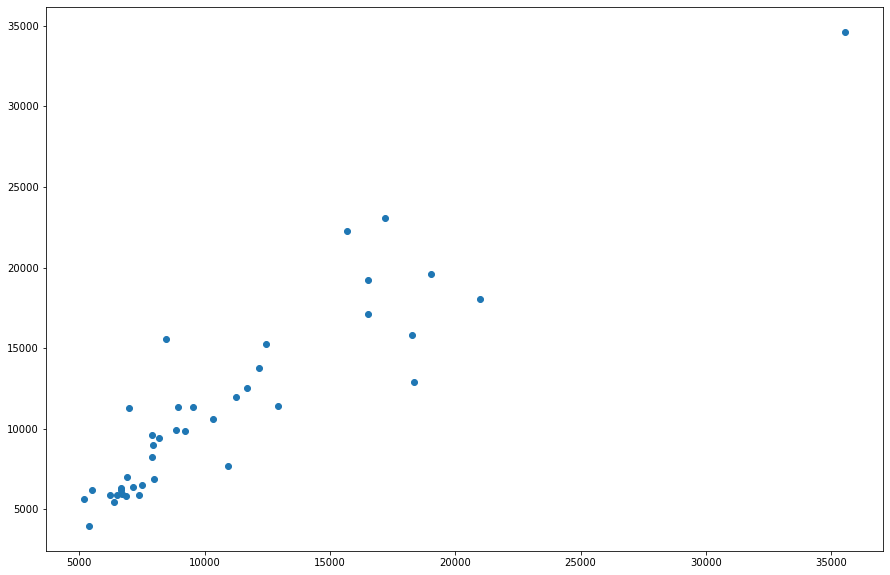

In [109]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.show()

### Here we can see some linear pattern between y_test and y_train

In [110]:
# Error calculation
mape(y_test,y_pred)

'MAPE Score of price    17.0\ndtype: float64'

In [114]:
# R-score value
r_score=r2_score(y_test,y_pred)
print("The R square value of the model is:",r_score)

The R square value of the model is: 0.8161258178252899
